## MIPS
noninteracting particles with motility restricted by density

In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Jupyter notebook magic for matplotlib
%matplotlib notebook

In [33]:
class MIPS:
    def __init__(self, N, eta):
        # Initialize simulation
        self.L = 20  # length of the square 2D region to be simulated
        self.halfL = self.L / 2  # half of length (used later for PBCs)
        self.N = N  # number of particles in the 2D region
        self.rho = N/self.L**2  # density of particles in the simulation
        self.eta = eta  # noise in the system
        self.r = 3  # interaction radius
        self.rsq = self.r * self.r  # square of interaction radius
        self.dt = 1.0  # time step
        self.vinit = 20
        self.v = self.vinit*np.ones(self.N)  # magnitude of velocity
        self.pos = np.random.rand(self.N, 2) * self.L  # random initial position in 2D region
        self.theta = (np.random.rand(self.N) * 2 - 1) * np.pi  # random velocity angle [-pi pi]
        self.vel = np.zeros((self.N, 2))  # initialize velocity array
        self.vel[:, 0] = self.v * np.cos(self.theta)  # velocity along x
        self.vel[:, 1] = self.v * np.sin(self.theta)  # velocity along y
        self.tt = 5000  # total number of time steps
        self.rparts = np.eye(N, dtype=np.bool)  # matrix representing particles within distance r

    def main(self):
        # Plot initial positions
        plt.ion()
        fig0 = plt.figure()
        ax0 = fig0.add_subplot(111)
        axrange = [0, self.L, 0, self.L]
        ax0.quiver(self.pos[:, 0], self.pos[:, 1], self.vel[:, 0], self.vel[:, 1])
        ax0.scatter(self.pos[:, 0], self.pos[:, 1],s=100,alpha=0.1)
        ax0.axis(axrange)
        ax0.set_aspect('equal', 'box')
        fig0.show()
        fig0.tight_layout()
        fig0.canvas.draw()
        #Setup plot for updated positions
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111)
        fig1.show()
        fig1.tight_layout()
        fig1.canvas.draw()
        for nn in range(self.tt):
            ax1.clear()
            ax1.quiver(self.pos[:, 0], self.pos[:, 1], self.vel[:, 0], self.vel[:, 1])
            ax1.scatter(self.pos[:, 0], self.pos[:, 1],s=100,alpha=0.1)
            ax1.axis(axrange)
            ax1.set_aspect('equal', 'box')
            fig1.canvas.draw()
            self.update()

    def update(self):

        # Generate the set of random movements dTheta from [-eta/2, eta/2]
        noise = (np.random.rand(self.N) - 0.5) * self.eta

        # Find particles within distance r
        self.find_particles()

#         # Initialize average theta
#         avg_theta = np.zeros(self.N)

#         for i in range(self.N):

#             # Angles of particles within separation r
#             rtheta = self.theta[self.rparts[i, :]]
#             avg_theta[i] = np.arctan2(np.mean(np.sin(rtheta)), np.mean(np.cos(rtheta)))

        # Updated angles = avg. angles + noise
#         for i in range(self.N):
#             self.theta[i] += noise[i]*10/(np.sum(self.rparts[i,:])+1)
        self.theta +=noise
    
    
    
        for i in range(self.N):
            neighbor = np.sum(self.rparts[i,:])
            self.v[i] = self.vinit/(1+neighbor + 0.1*neighbor**2)

        # Updated velocities
        self.vel[:, 0] = self.v * np.cos(self.theta)
        self.vel[:, 1] = self.v * np.sin(self.theta)

        # Updated positions
        self.pos = self.pos + self.vel * self.dt

        # Applying periodic boundaries
        self.pos = np.mod(self.pos, self.L)

    def find_particles(self):     # updated using matrix operation

        # Reset rparts matrix
        self.rparts = np.eye(self.N, dtype=np.bool)
        
        x = self.pos[:,0].reshape(1,-1)
        y = self.pos[:,1].reshape(1,-1)
        
        diffx = x-x.T
        diffy = y-y.T
        
        diffxn = -self.halfL + np.mod(diffx+self.halfL,self.L)
        diffyn = -self.halfL + np.mod(diffy+self.halfL,self.L)
        
        diff = diffxn**2+diffyn**2
        
        #self.rparts = 1/(diff/self.r**2+1)
        self.rparts = diff<self.rsq
        

#         for i in range(self.N):
#             for j in range(i + 1, self.N):

#                 diff = self.pos[i, :] - self.pos[j, :]

#                 # Apply minimum image criteria for periodic boundaries on diff
#                 for dim in range(2):
#                     while diff[dim] > self.halfL:
#                         diff[dim] = diff[dim] - self.L
#                     while diff[dim] < -self.halfL:
#                         diff[dim] = diff[dim] + self.L

#                 # Separation between particles squared
#                 sepsq = np.dot(diff, diff)
#                 rflag = sepsq < self.rsq
#                 self.rparts[i, j] = rflag
#                 self.rparts[j, i] = rflag

In [34]:
def start_AM_sim(num_particles=2, noise=0.5, v=20, r=3):
    v2d = MIPS(num_particles, noise)
    v2d.vinit = v
    v2d.r=r
    print("Box size =", v2d.L)
    print("Particle density =", v2d.rho)
    v2d.main()

Box size = 20
Particle density = 5.0


<IPython.core.display.Javascript object>


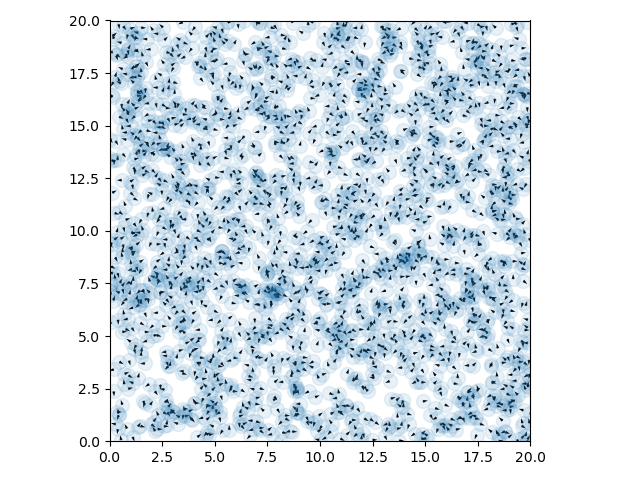

<IPython.core.display.Javascript object>


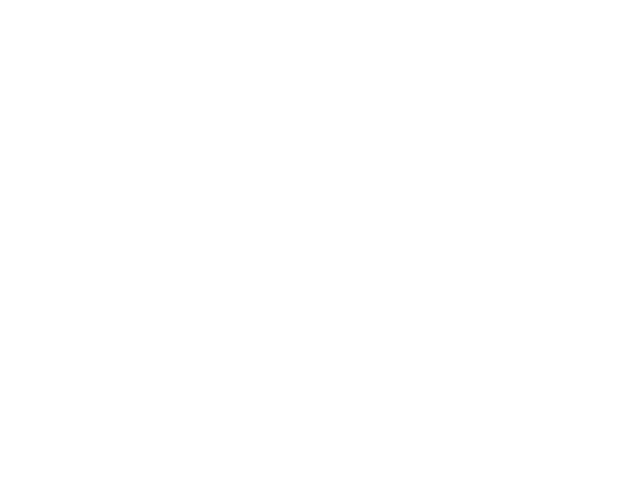

KeyboardInterrupt: 

In [37]:
# Interactive control for entering number of particles
style = {'description_width': 'initial'}    
# num_particles = widgets.IntSlider(description='Number of particles', style=style, 
#                                     min=100, max=1100, step=200, value=2, continuous_update=False)
# # Interactive control for entering noise
# noise = widgets.FloatSlider(description='Noise', style=style, 
#                              min=0.1, max=1, step=0.1, value=0, continuous_update=False)

num_particles = 2000
noise = 0.6
v=200
r=0.1

# Creating the interactive controls
# widget_ui = widgets.HBox([num_particles, noise])
# widget_out = widgets.interactive_output(start_AM_sim, 
#                                         {'num_particles': num_particles, 'noise': noise})
# # Display the controls and output
# # display(widget_ui, widget_out)
# display(widget_out)

start_AM_sim(num_particles,noise,v,r)